# Fake News Detection using Machine Learning algorithms
__[Dataset link](https://www.kaggle.com/c/fake-news/data?select=train.csv)__                                                                    
**id**: unique id for a news article                                                                                               
**title**: the title of a news article                                                                                             
**author**: author of the news article                                                                                             
**text**: the text of the article; could be incomplete                                                                             
**label**: a label that marks the article as potentially unreliable                                                               
<ul>
<li>0:Real</li>
<li>1:Fake</li>
</ul>

In [113]:
# importing required libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
warnings.filterwarnings("ignore")
%matplotlib inline

### Data Collection

In [114]:
# loading dataset to DataFrame
data = pd.read_csv("fake news dataset.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Data Cleaning

In [115]:
# getting rows and columns
data.shape

(20800, 5)

In [116]:
# checking null values
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [117]:
#dropping null values
data.dropna(inplace=True)

In [118]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [119]:
data.shape   # on dropping all the null values, now there are 18285 rows and 5 columns

(18285, 5)

In [120]:
# creating new column by concatinating required content for model
data["content"] = data["author"]+" "+data["title"]
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


0    10361
1     7924
Name: label, dtype: int64


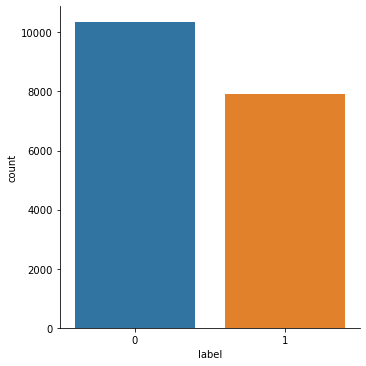

In [121]:
# counting & plotting the graph of total number of Real and Fake news
sns.catplot(data=data, x='label', kind='count')
print(data['label'].value_counts())

### Data Preprocessing

In [123]:
# splitting dependent values and target values
X = data["content"].values
Y = data["label"].values

In [124]:
# converting text data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer.fit(X)
X = vectorizer.transform(X)

In [125]:
# splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

### Model Training

In [126]:
# PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
pa_regressor = PassiveAggressiveClassifier()
pa_regressor.fit(X_train, Y_train)

PassiveAggressiveClassifier()

In [127]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_regressor = LogisticRegression()
lr_regressor.fit(X_train, Y_train)

LogisticRegression()

In [128]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_regressor = RandomForestClassifier()
rf_regressor.fit(X_train, Y_train)

RandomForestClassifier()

In [129]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb_regressor = MultinomialNB()
mnb_regressor.fit(X_train, Y_train)

MultinomialNB()

In [130]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc_regressor = DecisionTreeClassifier()
dtc_regressor.fit(X_train, Y_train)

DecisionTreeClassifier()

### Model Testing 

In [141]:
# checking accuracy for PassiveAggressiveClassifier
pa_pred = pa_regressor.predict(X_test)
pa_score = accuracy_score(pa_pred, Y_test)
pa_score

0.9934372436423298

In [142]:
# checking accuracy for LogisticRegression
lr_pred = lr_regressor.predict(X_test)
lr_score = accuracy_score(lr_pred, Y_test)
lr_score

0.9833196609242548

In [143]:
# checking accuracy for RandomForestClassifier
rf_pred = rf_regressor.predict(X_test)
rf_score = accuracy_score(rf_pred, Y_test)
rf_score

0.9948044845501778

In [144]:
# checking accuracy for MultinomialNB
mnb_pred = mnb_regressor.predict(X_test)
mnb_score = accuracy_score(mnb_pred, Y_test)
mnb_score

0.9472245009570687

In [145]:
# checking accuracy for DecisionTreeClassifier
dtc_pred = dtc_regressor.predict(X_test)
dtc_score = accuracy_score(dtc_pred, Y_test)
dtc_score

0.9945310363686082

### Conclusion

In [152]:
# creating new result DataFrame 
result = pd.DataFrame({
    'Model':['PassiveAggressiveClassifier', 'LogisticRegression', 'RandomForestClassifier', 
             'MultinomialNB', 'DecisionTreeClassifier'],
    'Score':[round(pa_score*100, 2), round(lr_score*100, 2), round(rf_score*100, 2), 
             round(mnb_score*100, 2), round(dtc_score*100, 2)]
})

<AxesSubplot:xlabel='Score', ylabel='Model'>

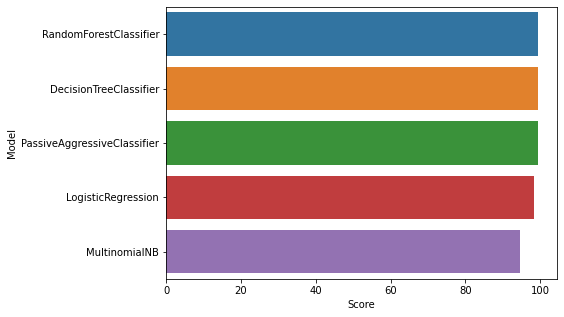

In [153]:
# plotting the graph of model performance
plt.figure(figsize=(7, 5))
sns.barplot(data=result.sort_values(by='Score', ascending=False), x="Score", y="Model")

In [154]:
# modified DataFrame
result['Score'] = result['Score'].apply(lambda cell: f'{cell}'+'%')
result.sort_values(by='Score', ascending=False)

,Model,Score
2,RandomForestClassifier,99.48%
4,DecisionTreeClassifier,99.45%
0,PassiveAggressiveClassifier,99.34%
1,LogisticRegression,98.33%
3,MultinomialNB,94.72%


Text(33.0, 0.5, 'Predicted Values')

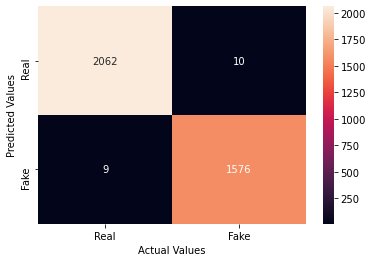

In [155]:
# plotting confusion matrix for RandomForestClassifier predicted values
c_mat = confusion_matrix(Y_test, rf_pred)
label = ["Real", "Fake"]
sns.heatmap(c_mat, annot=True, fmt='g', xticklabels=label, yticklabels=label)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [156]:
# classification report
print(classification_report(rf_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2071
           1       0.99      0.99      0.99      1586

    accuracy                           0.99      3657
   macro avg       0.99      0.99      0.99      3657
weighted avg       0.99      0.99      0.99      3657



In terms of accuracy, RandomForestClassifier is the best classification algorithm for this dataset.                                 
In terms of speed, PassiveAggressiveClassifier is the best classification algorithm for this dataset.